In [1]:
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.colors as colors
from collections import Counter
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import math
from lmfit.models import GaussianModel
from sklearn import mixture
from matplotlib.colors import LogNorm

In [2]:
cdf = pycdf.CDF('/Users/mayur/PhD/Cluster_data/C2_CP_PEA_PITCH_SPIN_DEFlux__20090208_043300_20090208_061800_V170911.cdf')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf, start=0):
    print(i, item, cdf[i])

0 time_tags__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_EPOCH [1520]
1 time_tags_DeltaLower__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1520]
2 time_tags_DeltaUpper__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1520]
3 Angle_SR2phi__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1520]
4 Mode_SunpulseRephaseOffset__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1520]
5 Mode_Sensor__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1520]
6 Mode_SweepMode_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1520]
7 Mode_Preset_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1520]
8 Mode_EnergyLevelRange_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1520, 2]
9 Mode_EnergyMaxMin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_FLOAT [1520, 2]
10 Mode_MCPlevel_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1520]
11 Mode_DataOrigin_HEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1520]
12 Mode_SweepMode_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1520]
13 Mode_Preset_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux CDF_INT4 [1520]
14 Mode_EnergyLevelRange_LEEA__C2_CP_PEA_PITCH_SPIN_DEFlux 

In [3]:
epoch = cdf[0][...]
data = cdf[26][...]
energy = cdf[20][...]
pa = cdf[23][...]

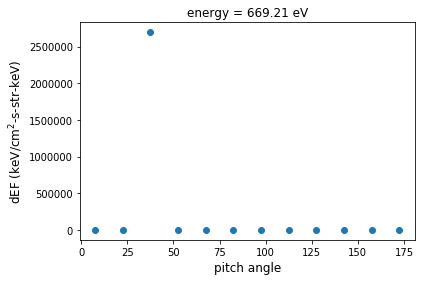

FWHM =  11


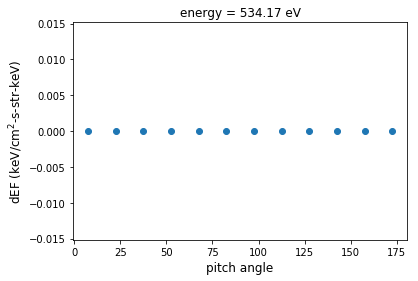

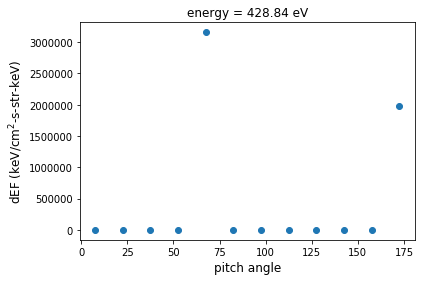

FWHM =  35


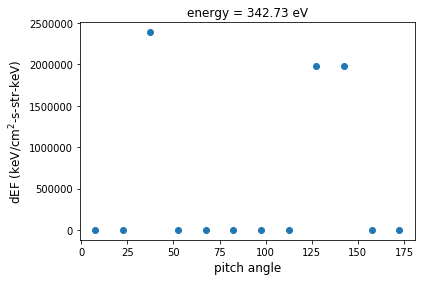

FWHM =  42


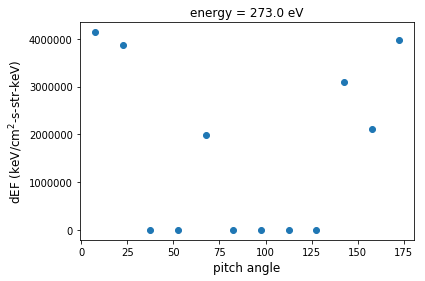

FWHM =  49


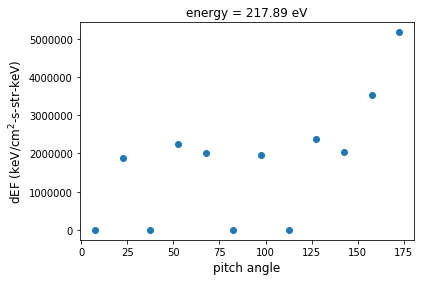

FWHM =  7


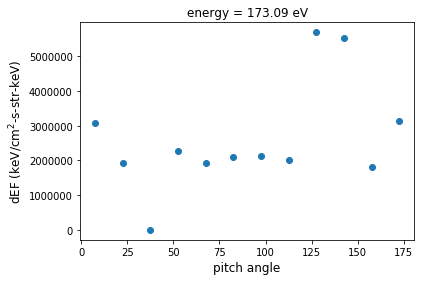

FWHM =  49


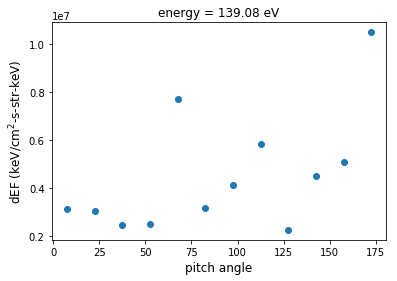

FWHM =  4


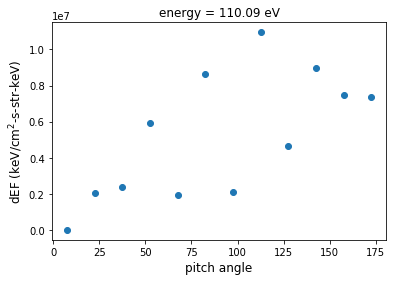

FWHM =  36


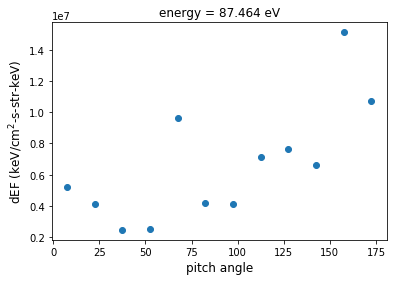

FWHM =  14


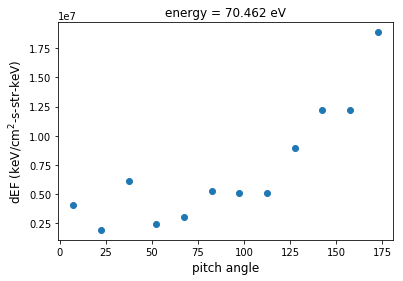

FWHM =  11


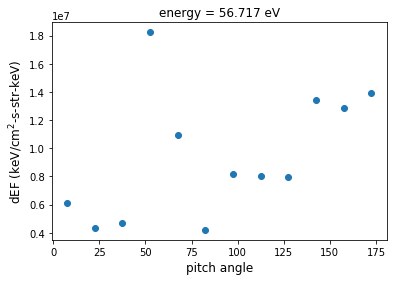

FWHM =  40
[6120.9   4911.    3952.    3156.1   2531.    2030.1   1621.7   1296.2
 1039.9    832.28   669.21   534.17   428.84   342.73   273.     217.89
  173.09   139.08   110.09    87.464   70.462   56.717   47.865   37.66
   30.091   24.348   19.568   15.779   12.543   10.073]


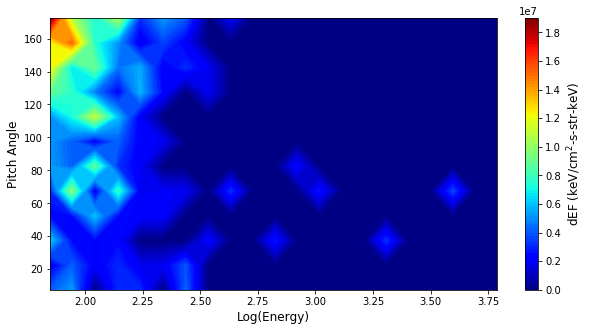

In [4]:
time = 150

#PITCH_SPIN line plotting:

for n in range(10,22):
    y = data[time,0:12,n]
    #plt.plot(pa,y)
    
    t = np.polyfit(pa[0:12], y, 5)
    f = np.poly1d(t)
    pa_new = np.linspace(pa[0], pa[11], 50)
    y_new = f(pa_new)
    #plt.plot(pa[0:12],y,'o', pa_new, y_new)
    plt.scatter(pa[0:12],y)
    plt.title("energy = " + str(energy[time,n]) + " eV")
    plt.xlabel("pitch angle",fontsize=12)
    plt.ylabel("dEF (keV/cm$^{2}$-s-str-keV)",fontsize=12)
    plt.show()
    xs = [x for x in range(50) if y_new[x] > np.max(y_new)/2.0]
    if np.mean(y_new)>0:
        fwhm = np.max(xs)-np.min(xs)
        print('FWHM = ', fwhm)
    
#PITCH_SPIN 2D plotting:
X, Y = np.meshgrid(energy[time,0:21],pa)
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
D = data[time,0:len(pa),0:21]
surf = ax.contourf(np.log10(X), Y, D, 100, cmap=cm.jet)
cbar = fig.colorbar(surf)
cbar.set_label('dEF (keV/cm$^{2}$-s-str-keV)',fontsize=12)
ax.set_ylabel('Pitch Angle',fontsize=12)
ax.set_xlabel('Log(Energy)',fontsize=12)
#ax.set_xlim(0,5)

print(energy[time,0:30])


In [4]:
#breakpoint at 0 degrees

yt_0 = []

    
for n in range(12,30):
    ymean_0 = []
    for t in range(0,len(epoch)):
        y_0 = data[t,0,n]
        ymean_0.append(y_0)
        
        ym_0 = np.mean(ymean_0)
    del ymean_0
    yt_0.append(ym_0)

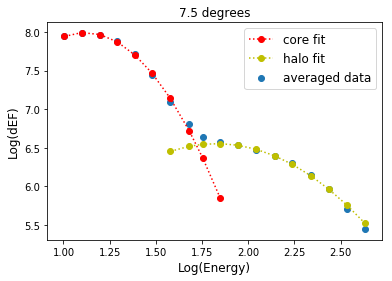

In [6]:
#fit to core
time = 0
x = np.log10(energy[time,23:30])

y = yt_0[11:18]

n = len(x)                          #the number of data
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[np.max(y),mean,sigma],maxfev=10000)

#fit to halo
x1 = np.log10(energy[time,12:20])

y1 = yt_0[0:8]

n1 = len(x1)                          #the number of data
mean1 = sum(x1 * y1) / sum(y1)
sigma1 = np.sqrt(sum(y1 * (x1 - mean1)**2) / sum(y1))

def gaus1(x1,a1,x01,sigma1):
    return a1*np.exp(-(x1-x01)**2/(2*sigma1**2))

popt1,pcov1 = curve_fit(gaus1,x1,y1,p0=[np.max(y1),mean1,sigma1],maxfev=10000)

plt.scatter(np.log10(energy[0,12:30]),np.log10(yt_0),label='averaged data')
plt.plot(np.log10(energy[time,20:30]),np.log10(gaus(np.log10(energy[time,20:30]),*popt)),'ro:',label='core fit')
plt.plot(np.log10(energy[time,12:24]),np.log10(gaus1(np.log10(energy[time,12:24]),*popt1)),'yo:',label='halo fit')
plt.title("7.5 degrees")
plt.xlabel("Log(Energy)",fontsize=12)
plt.ylabel("Log(dEF)",fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [7]:
#breakpoint at 90 degrees

yt_90 = []

    
for n in range(12,30):
    ymean_90 = []
    for t in range(0,len(epoch)):
        y_90 = data[t,5:7,n]
        ymean_90.append(y_90)
        
        ym_90 = np.mean(ymean_90)
    del ymean_90
    yt_90.append(ym_90)

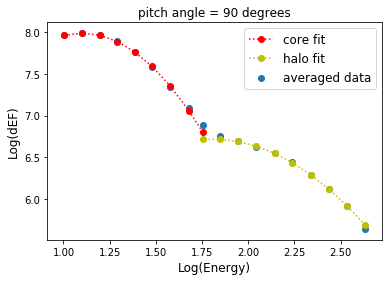

In [15]:
#fit to core
x = np.log10(energy[0,22:30])

y = yt_90[10:18]

n = len(x)                          #the number of data
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[np.max(y),mean,sigma],maxfev=10000)

#fit to halo
x1 = np.log10(energy[0,12:20])

y1 = yt_90[0:8]

n1 = len(x1)                          #the number of data
mean1 = sum(x1 * y1) / sum(y1)
sigma1 = np.sqrt(sum(y1 * (x1 - mean1)**2) / sum(y1))

def gaus1(x1,a1,x01,sigma1):
    return a1*np.exp(-(x1-x01)**2/(2*sigma1**2))

popt1,pcov1 = curve_fit(gaus1,x1,y1,p0=[np.max(y1),mean1,sigma1],maxfev=10000)

plt.scatter(np.log10(energy[0,12:30]),np.log10(yt_90),label='averaged data')
plt.plot(np.log10(energy[0,21:30]),np.log10(gaus(np.log10(energy[0,21:30]),*popt)),'ro:',label='core fit')
plt.plot(np.log10(energy[0,12:22]),np.log10(gaus1(np.log10(energy[0,12:22]),*popt1)),'yo:',label='halo fit')
plt.title("pitch angle = 90 degrees")
plt.xlabel("Log(Energy)",fontsize=12)
plt.ylabel("Log(dEF)",fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [8]:
#breakpoint at 180 degrees

ymean_180 = []
yt_180 = []

    
for n in range(12,30):
    for t in range(0,len(epoch)):
        y_180 = data[t,11,n]
        ymean_180.append(y_180)
        
        ym_180 = np.mean(ymean_180)
    yt_180.append(ym_180)

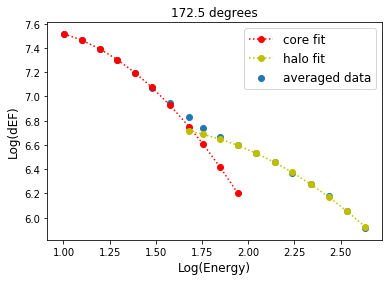

In [13]:
#fit to core
x = np.log10(energy[time,23:30])

y = yt_180[11:18]

n = len(x)                          #the number of data
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[np.max(y),mean,sigma],maxfev=10000)

#fit to halo
x1 = np.log10(energy[time,12:20])

y1 = yt_180[0:8]

n1 = len(x1)                          #the number of data
mean1 = sum(x1 * y1) / sum(y1)
sigma1 = np.sqrt(sum(y1 * (x1 - mean1)**2) / sum(y1))

def gaus1(x1,a1,x01,sigma1):
    return a1*np.exp(-(x1-x01)**2/(2*sigma1**2))

popt1,pcov1 = curve_fit(gaus1,x1,y1,p0=[np.max(y1),mean1,sigma1],maxfev=10000)

plt.scatter(np.log10(energy[0,12:30]),np.log10(yt_180),label='averaged data')
plt.plot(np.log10(energy[time,19:30]),np.log10(gaus(np.log10(energy[time,19:30]),*popt)),'ro:',label='core fit')
plt.plot(np.log10(energy[time,12:23]),np.log10(gaus1(np.log10(energy[time,12:23]),*popt1)),'yo:',label='halo fit')
plt.title("172.5 degrees")
plt.xlabel("Log(Energy)",fontsize=12)
plt.ylabel("Log(dEF)",fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [5]:
bp_fluxes = []
all_energies = []

for i in range(0,len(epoch)):
    for j in range(14,25):
        flux = data[i,0:12,j]
        
        e = energy[0,j]
        all_energies.append(e)
        
        #if np.max(flux)>0:
        #    flux = (flux-np.min(flux))/(np.max(flux)-np.min(flux))
        
        flux[flux == -1.] = 0.
        
        bp_fluxes.append(flux)
        
#bp_fluxes = StandardScaler().fit_transform(bp_fluxes)
print(np.shape(bp_fluxes))

(16720, 12)


In [9]:
bp = []

from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
all_cluster_s = k_means.fit(bp_fluxes)

for (i, item) in enumerate(all_cluster_s.labels_, start=0):
    #print(i, all_energies[i], all_cluster_s.labels_[i])
    if all_cluster_s.labels_[i]>all_cluster_s.labels_[i-1]:
        bp.append(all_energies[i-1])

bp = np.array(bp)
print(Counter(bp))
#print("breakpoint energy as calculated by kmeans = ", stats.mode(bp)[0][0])
print("breakpoint energy as calculated by kmeans = ", np.mean(bp))

Counter({47.865: 1474, 37.66: 44, 56.717: 2})
breakpoint energy as calculated by kmeans =  47.58124


In [10]:
#compare kmeans to labelling PADs depending on if their energy is above or below bp energy from graphs
var = [0,0,0,0,0,0,0,0,1,1,1]
var_1 = np.tile(var,len(epoch))
print(np.shape(var_1))
print(metrics.accuracy_score(var_1, all_cluster_s.labels_))

(16720,)
0.906578947368421
